In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv("stellar_cluster.csv")
#print (data.head())

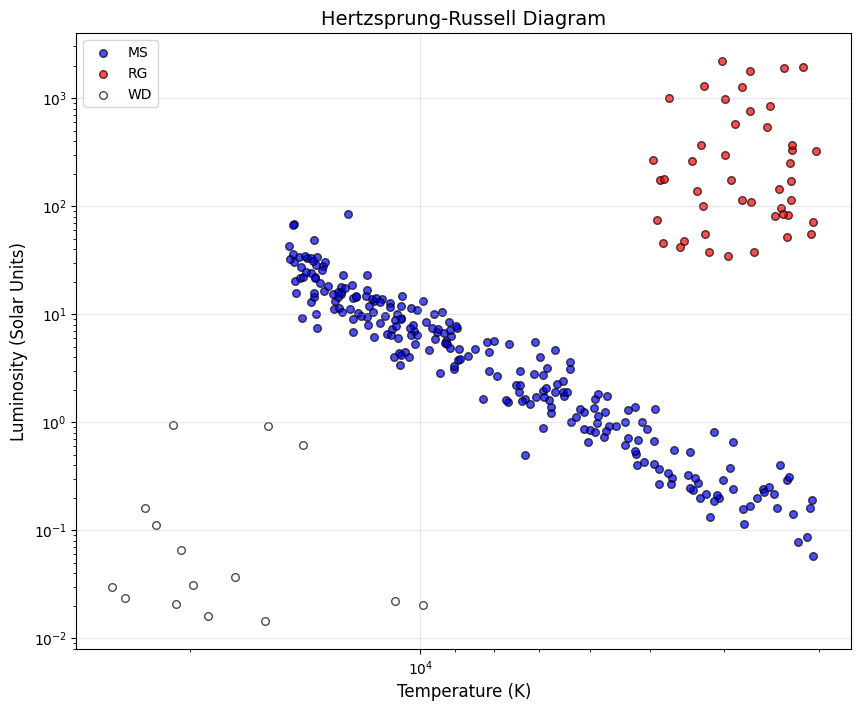

In [5]:
plt.figure(figsize = (10,8))
for star_type, color in [('MS', 'blue'), ('RG', 'red'), ('WD', 'white')]:
    mask = data['star_type'] == star_type
    plt.scatter(data[mask]['temperature_K'], 
                10**data[mask]['log_luminosity'],
                c=color, 
                edgecolors='black',
                s=30,
                alpha=0.7,
                label=star_type)

plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Luminosity (Solar Units)', fontsize=12)
plt.title('Hertzsprung-Russell Diagram', fontsize=14)

plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()

plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('my_hr_diagram.png', dpi=150)
plt.show()


In [6]:
ms_data = data[data['star_type'] == 'MS']

print(f"Total stars: {len(data)}")
print(f"Main sequence stars: {len(ms_data)}")

Total stars: 300
Main sequence stars: 240


Loading stellar cluster data...
Loaded 300 stars
Main Sequence: 240
Red Giants: 45
White Dwarfs: 15


/var/folders/gl/pb31_0s17tzfqmv3rstwv96c0000gn/T/ipykernel_49890/2680291758.py:67: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gl/pb31_0s17tzfqmv3rstwv96c0000gn/T/ipykernel_49890/2680291758.py:68: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.savefig('star_cluster_3d.png', dpi=150, facecolor='black')



✓ 3D plot saved to: star_cluster_3d.png


/Users/saniasingh/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


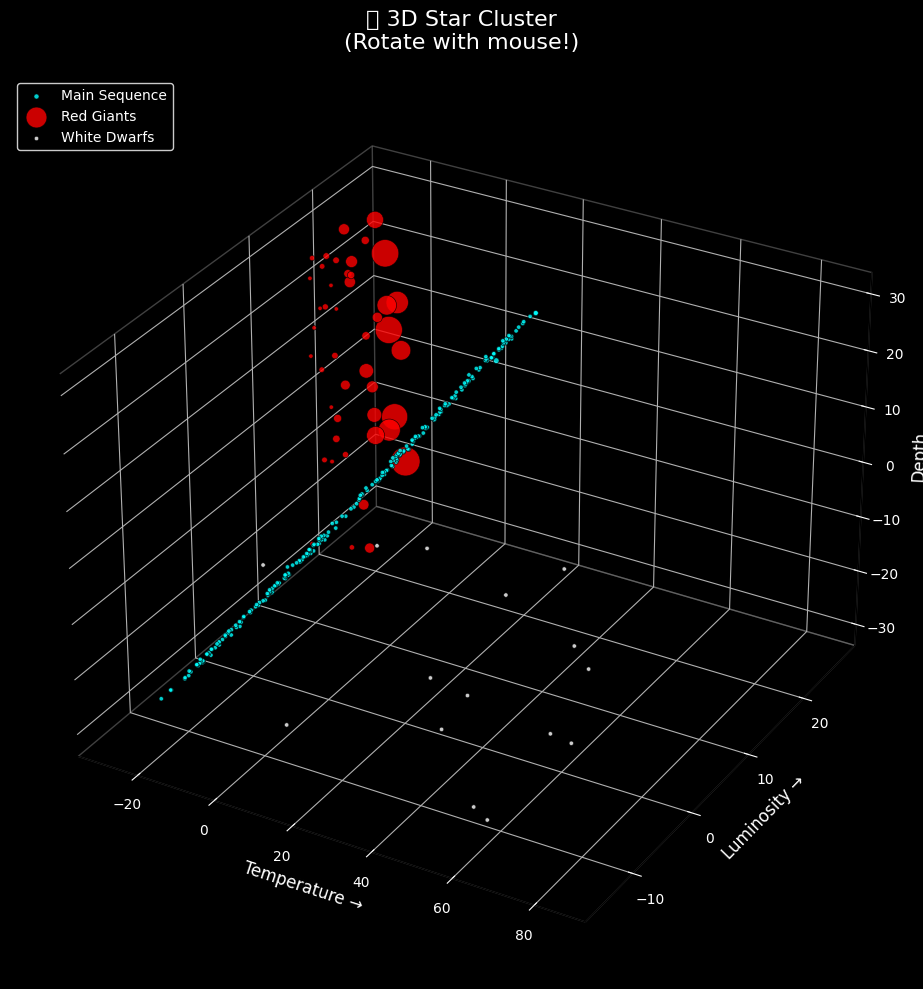

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Load the stellar data
print("Loading stellar cluster data...")
data = pd.read_csv('stellar_cluster.csv')

print(f"Loaded {len(data)} stars")
print(f"Main Sequence: {len(data[data['star_type'] == 'MS'])}")
print(f"Red Giants: {len(data[data['star_type'] == 'RG'])}")
print(f"White Dwarfs: {len(data[data['star_type'] == 'WD'])}")

# Create 3D positions
x_pos = (data['temperature_K'] - data['temperature_K'].mean()) / 200
y_pos = data['log_luminosity'] * 8
np.random.seed(42)
z_pos = np.random.uniform(-30, 30, len(data))

# Size based on luminosity
sizes = np.maximum(10, np.power(10, data['log_luminosity']) / 5)

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot each star type
star_types = {
    'MS': {'color': 'cyan', 'name': 'Main Sequence'},
    'RG': {'color': 'red', 'name': 'Red Giants'},
    'WD': {'color': 'white', 'name': 'White Dwarfs'}
}

for star_type, props in star_types.items():
    mask = data['star_type'] == star_type
    ax.scatter(x_pos[mask], y_pos[mask], z_pos[mask],
               c=props['color'], 
               s=sizes[mask], 
               alpha=0.8,
               edgecolors='black',
               linewidths=0.5,
               label=props['name'])

# Labels and title
ax.set_xlabel('Temperature →', color='white', fontsize=12)
ax.set_ylabel('Luminosity →', color='white', fontsize=12)
ax.set_zlabel('Depth', color='white', fontsize=12)
ax.set_title('🌟 3D Star Cluster\n(Rotate with mouse!)', 
             color='white', fontsize=16, pad=20)

# Style the axes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')
ax.tick_params(colors='white')
ax.grid(True, alpha=0.3)

# Legend
ax.legend(loc='upper left', facecolor='black', edgecolor='white', 
          labelcolor='white', framealpha=0.8)

plt.tight_layout()
plt.savefig('star_cluster_3d.png', dpi=150, facecolor='black')
print("\n✓ 3D plot saved to: star_cluster_3d.png")
plt.show()